# K-Nearest Neighbors (KNN)

[k-nearest neighbors algorithm (k-NN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is a `non-parametric` `supervised learning` method, 
its used for `classification` and `regression`.

簡單來說，就是物以類聚的概念。如果你的鄰居10戶有8戶是有錢人，那你十之八九也是有錢人! 
KNN用途很廣，適用於`離散型資料`，也適用於`連續型資料`。

```
概念與「近朱者赤，近墨者黑」相同」。用周圍資料決定其分類
```

參考: [PyInvest: K-近鄰演算法 KNN](https://www.youtube.com/watch?v=RWvM-9V3UzY)

## KNN 的運作模式

找到距離最近的K個鄰居→進行投票→決定類別

主要運作模式分為3步驟:

1. 計算每個點之間的距離
2. 用K值決定鄰居數目，並進行投票 (在連續型資料中，則是計算平均數)
3. 以投票結果決定類別

## Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

## Import Data

In [2]:
iris=datasets.load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Splitting training and testing dataset

In [3]:
X = df_data.drop(labels=['Species'], axis=1).values # iris.data
Y = df_data['Species'].values # iris.target

#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

print('train shape:', x_train.shape)
print('test shape:', x_test.shape)

train shape: (105, 4)
test shape: (45, 4)


## k-nearest neighbors(KNN) model

[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

- Parameters:
    - n_neighbors: 設定鄰居的數量(k)，選取最近的k個點，預設為 `5`。
    - weights: 投票方式為一樣權重或加權，預設 `uniform`
      - `uniform`: All points in each neighborhood are weighted equally
      - `distance`: weight points by the inverse of their distanc (越近越重要)
    - p: 選擇距離的計算方式，預設 `2`
      - Power parameter for the `Minkowski metric (明氏距離)`
        - `p = 1`: `Manhattan Distance (曼哈頓距離)`
        - `p = 2`: `Euclidean Distance (歐基里德距離)`
    - algorithm: 搜尋演算法的選擇(計算效率的考慮)，預設 `auto`
      - '[ball_tree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)'
      - '[kd_tree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree)'
      - 'brute'
      - 'auto'
    - metric: 計算距離的方式，預設為`歐幾里得距離`。

- Attributes:
    - classes_: Class labels known to the classifier
    - effective_metric_: 取得計算距離的公式。


In [4]:
# Build KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 預測 (Predict)

In [5]:
y_pred = model.predict(x_test)
y_pred

array([2., 1., 1., 1., 2., 2., 1., 1., 0., 2., 0., 0., 2., 2., 0., 2., 1.,
       0., 0., 0., 1., 0., 1., 2., 2., 1., 1., 1., 1., 0., 2., 2., 1., 0.,
       2., 0., 0., 0., 0., 1., 1., 0., 1., 2., 1.])

## 使用 Score 評估模型

我們可以直接呼叫 `score()` 直接計算模型預測的準確率。

In [6]:
print('準確度: ', model.score(x_test, y_test))

準確度:  0.9555555555555556


## Visualizing Predictions vs Ground Truths

Using [seaborn.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)


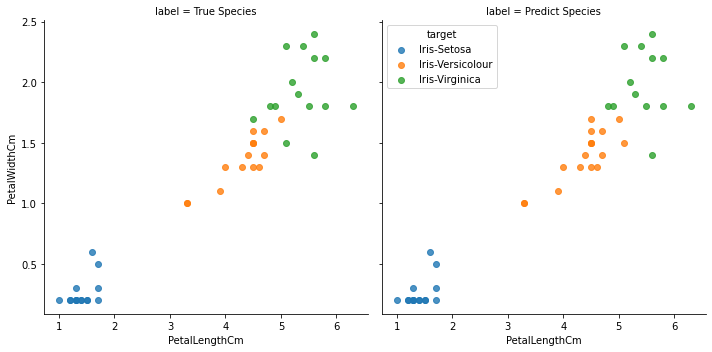

In [7]:
# build the DataFrame of testing set
# 為了將真實結果與預測結果放在同一張圖
# 所以我們將 df_test 分成兩部分

# Part 1: data part
df_test1 = pd.DataFrame(x_test, columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
df_test1 = df_test1.drop(labels=['SepalLengthCm','SepalWidthCm'], axis=1)

# Part 2: label part
# Because we need to plot with `truth` and `predict` in same figure,
# so we change columes to rows
df_test2 = pd.DataFrame(y_test, columns=['True Species'])
df_test2['Predict Species'] = y_pred
df_test2 = (
    df_test2.stack() # pull the columns into row variables   
            .to_frame() # convert the resulting Series to a DataFrame
            .reset_index() # pull the resulting MultiIndex into the columns
            .rename(columns={'level_0':'idx', 'level_1':'label', 0: 'val'}) # rename the unnamed column
)

# Merge two DataFrame by index
df_test = pd.merge(df_test1, df_test2, left_index=True, right_on="idx")
#print(df_test)

# 左邊的是測試集的真實分類，右邊的是模型預測的分類結果。
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', hue='val', col='label',
           data=df_test, fit_reg=False, legend=False)
plt.legend(title='target', loc='upper left', 
           labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])


## 尋找合適的 K 值

- 一般來說，我們會盡量選擇K為奇數，以避免平手的情況
- 最大預設在樣本數的平方根


In [8]:
len(x_train)

105

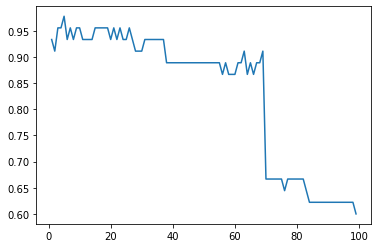

In [9]:
accuracy = []

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

k_range = range(1, 100)
plt.plot(k_range, accuracy)

# [Option] Implementing the KNN Classification

## Algorithm

The KNN algorithm is as follows:

1. 每一個測試資料點，計算它跟其他所有訓練或目標資料的距離
2. 找出距離最近的k個資料點 (Retrieve the indices of the k-nearest neighbors)
3. 找出k個資料點相對應得類別標籤(class label)，並返回多數的標籤-> `投票(vote)`

#### Notes

當數據量很大時，需要計算每個點之間的距離，並且找出最近的K個點，計算量非常大 -> (`Brute Force`)

可以使用 [Ball Tree](https://scikit-learn.org/stable/modules/neighbors.html#ball-tree) 或 [KD Tree](https://scikit-learn.org/stable/modules/neighbors.html#kd-tree) 來實作

In [10]:
from collections import Counter

# like KNeighborsClassifier()
class KNNclassifier():
    def __init__(self, n_neighbors=5, p=2):
        """
        param n_neighbors: 鄰近K個點。
        param p: 距離度量。
                 (Σ|xi-yi|^p)^(1/p)
                 p = 1: Manhattan Distance Σ|xi-yi|
                 p = 2: Euclidean Distance (Σ|xi-yi|^2)^(1/2)
        """
        self.n_neighbors = n_neighbors
        self.p = p
        
    def _compute_distances(self, x):
        """
        parama x: the point who we want calculate distance
        parama dataset: testing data
        """
        distances = []
        if self.p == 2:
            distances = self._euclidean_distance(x)
        return distances
    
    # Calculate the Euclidean distance.
    def _euclidean_distance(self, x):
        distances = []
        for y in self.X_train:
            dist = np.linalg.norm(x - y, ord=2)
            distances.append(dist)
        return distances
    
    # Retrieve the indices of the k-nearest neighbors.
    def _get_neighbors_idx(self, distances, k):
        """
        param neighbors_idx: indices of k-nearest neighbors 
        """
        # get indices of k-nearest neighbors -> k-smallest distances
        neighbors_idx = np.argsort(distances)[:k]
        return neighbors_idx

    # votes:
    #   1. get the corresponding class labels 
    #   2. return the most-common label.
    def _votes(self, neighbors_idx):
        # get corresponding y-labels of training data
        labels = [self.y_train[idx] for idx in neighbors_idx]
        # return most-common label
        return np.argmax(np.bincount(labels))
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # Predict the class labels for the provided data.
    def predict(self, X):
        y_pred = []
        for x in X:
            distances = self._compute_distances(x)
            neighbors_idx = self._get_neighbors_idx(distances, self.n_neighbors)
            label = self._votes(neighbors_idx)
            y_pred.append(label)
        y_pred = np.array(y_pred, dtype=np.float64)
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.sum(y == y_pred) / len(y)
        return accuracy

In [11]:
kmodel = KNNclassifier(n_neighbors=3)
kmodel.fit(x_train, y_train)
y_pred = kmodel.predict(x_test)
print('準確度: ', model.score(x_test, y_test))

準確度:  0.9555555555555556


## Visualizing Predictions vs Ground Truths

In [12]:
def plot_results(x_test, y_test, y_pred):
    # Part 1: data part
    df_test1 = pd.DataFrame(x_test, columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
    df_test1 = df_test1.drop(labels=['SepalLengthCm','SepalWidthCm'], axis=1)

    # Part 2: label part
    # Because we need to plot with `truth` and `predict` in same figure,
    # so we change columes to rows
    df_test2 = pd.DataFrame(y_test, columns=['True Species'])
    df_test2['Predict Species'] = y_pred
    df_test2 = (
        df_test2.stack() # pull the columns into row variables   
                .to_frame() # convert the resulting Series to a DataFrame
                .reset_index() # pull the resulting MultiIndex into the columns
                .rename(columns={'level_0':'idx', 'level_1':'label', 0: 'val'}) # rename the unnamed column
    )

    # Merge two DataFrame by index
    df_test = pd.merge(df_test1, df_test2, left_index=True, right_on="idx")

    # 左邊的是測試集的真實分類，右邊的是模型預測的分類結果。
    sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', hue='val', col='label',
            data=df_test, fit_reg=False, legend=False)
    plt.legend(title='target', loc='upper left', 
            labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

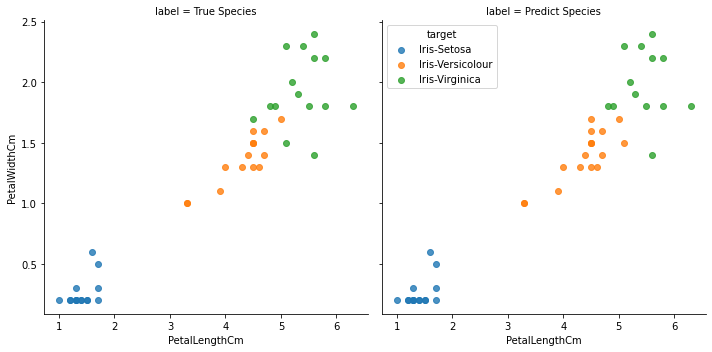

In [13]:
plot_results(x_test, y_test, y_pred)